In [1]:
import numpy as np
import random as rd
import networkx as nt

In [2]:
#Inicialization
#Text file filled with matrix of adjacency
#Idea from https://www.geeksforgeeks.org/numpy-loadtxt-in-python/?ref=gcse
path = np.loadtxt("MediumGraph.txt", dtype=int)
#Number of nodes in a graph
numNodes = len(path)
#Set of visited nodes
visited = set()

In [3]:
#Funcion that generates graph form number of nodes and matrix of adjacency
def generateGraph(numNodes, path):
    path = np.array(path)
    #Dictionary of adges in a graph
    #Idea for dictionary is from https://www.geeksforgeeks.org/python-dictionary/?ref=gcse
    graph = {i: [] for i in range(numNodes)}

    #Filling the dictionary
    for i in range(numNodes):
        for j in range(numNodes):
            if path[i][j] == 1:
                graph[i].append(j)
        
    return graph

In [4]:
#Call of a funcion
graph = generateGraph(numNodes, path)
#Checking if it works correctly
print(graph)

{0: [1, 2], 1: [2, 3, 4], 2: [3, 5], 3: [4, 5], 4: [], 5: []}


In [5]:
#Funcion that shows graph
#Modified from 
#https://www.geeksforgeeks.org/python-visualize-graphs-generated-in-networkx-using-matplotlib/?ref=gcse
def showGraph(numNodes, graph):
    G = nt.Graph()
    for i in range(numNodes):
        G.add_node(i)
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)
        
        
    pos = nt.spring_layout(G)
    nt.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=12, font_color="black", font_weight="bold")

In [6]:
#Depth-First Search algorithm for finding the longest path in a graph
def DFS(visited, graph, node):
    if node not in visited: 
        visited.add(node)
        for neighbor in graph[node]:
            if node in visited:
                DFS(visited, graph, neighbor)
    return len(visited) - 1

Longest path: 5


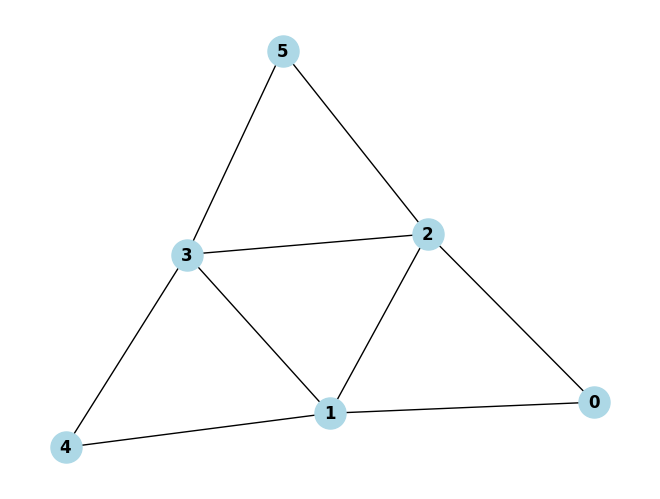

In [7]:
#Showing the graph
showGraph(numNodes, graph)
#Final answer to the problem
#print(DFS(visited, graph, 0))
max = 0
currMax = max
for i in range(numNodes):
    currMax = DFS(visited, graph, i)
    if(currMax > max):
        max = currMax
print('Longest path:',max)